# 1

In [13]:
import numpy as num
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
max_tem=num.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_tem=num.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

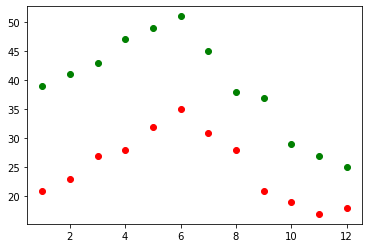

In [15]:
months=num.arange(1,13)
plt.plot(months,max_tem,'go')
plt.plot(months,min_tem,'ro')

In [20]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * num.cos((times + time_offset) * 1.8 * num.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_tem, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_tem, [-40, 20, 0])

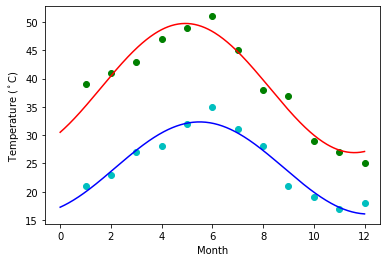

In [23]:

days = num.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_tem, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_tem, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# 2

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
val1=df.sex.value_counts()
val1

male      843
female    466
Name: sex, dtype: int64

In [27]:
df.sex.unique()[1]

'male'

In [28]:
size=[val1[0],val1[1]]
labels=[df.sex.unique()[1],df.sex.unique()[0]]


([<matplotlib.patches.Wedge at 0x2b5175e77c0>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.40%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.60%')])

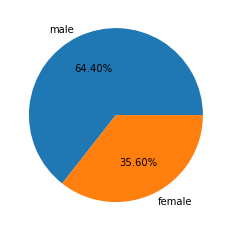

In [29]:
plt.pie(size,labels=labels,autopct='%0.2f%%')

<AxesSubplot:xlabel='age', ylabel='fare'>

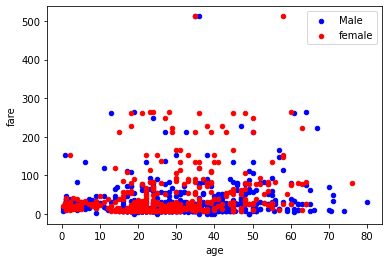

In [30]:
cat=df[df.sex=='male'].plot.scatter('age','fare',label='Male',color='blue')
df[df.sex=='female'].plot.scatter('age','fare',label='female',ax=cat,color='red')